In [1]:
pip install xgbfir

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
from collections import OrderedDict


#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci


#Imorting machine learning model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost
import xgbfir

#feature
from sklearn.feature_selection import SelectFromModel



# Libraries for validation matrix(model)
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import learning_curve

In [3]:
# Lading the Data

data = pd.read_excel('Capstone Project.xlsx')

In [4]:
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
# Creating backup of the original data

In [6]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
data_copy1 = data

In [8]:
data_copy2 = data

In [9]:
data.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [10]:
# Viewing the basic descriptive statistics

data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [11]:
# Building Custom Summary function for EDA report

In [12]:
def custom_summry(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in data[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [13]:
custom_summry(data)

Feature Name  Count  Minimum  Quartile1        Mean   Median  Quartile3  \
0        cement   1030   102.00    192.375  281.167864  272.900    350.000   
1          slag   1030     0.00      0.000   73.895825   22.000    142.950   
2           ash   1030     0.00      0.000   54.188350    0.000    118.300   
3         water   1030   121.80    164.900  181.567282  185.000    192.000   
4  superplastic   1030     0.00      0.000    6.204660    6.400     10.200   
5     coarseagg   1030   801.00    932.000  972.918932  968.000   1029.400   
6       fineagg   1030   594.00    730.950  773.580485  779.500    824.000   
7           age   1030     1.00      7.000   45.662136   28.000     56.000   
8      strength   1030     2.33     23.710   35.817961   34.445     46.135   

       IQR  Maximum      Variance  Standard Deviation  Skewness   Kurtosis  \
0  157.625    540.0  10921.580220          104.506364  0.509481  -0.520652   
1  142.950    359.4   7444.124812           86.279342  0.800717  -0.508175   
2  118.300    200.1   4095.616541           63.997004  0.537354  -1.328746   
3   27.100    247.0    456.002651           21.354219  0.074628   0.122082   
4   10.200     32.2     35.686781            5.973841  0.907203   1.411269   
5   97.400   1145.0   6045.677357           77.753954 -0.040220  -0.599016   
6   93.050    992.6   6428.187792           80.175980 -0.253010  -0.102177   
7   49.000    365.0   3990.437729           63.169912  3.269177  12.168989   
8   22.425     82.6    279.081814           16.705742  0.416977  -0.313725   

         Skeweness Comment outlier_comment  
0  Moderately Skewed (+ve)      No outlier  
1  Moderately Skewed (+ve)     Has outlier  
2  Moderately Skewed (+ve)      No outlier  
3    Fairly Symmetric(+ve)     Has outlier  
4  Moderately Skewed (+ve)     Has outlier  
5    Fairly Symmetric(-ve)      No outlier  
6    Fairly Symmetric(-ve)     Has outlier  
7       Higly (+ve) Skewed     Has outlier  
8    Fairly Symmetric(+ve)     Has outlier

In [14]:
# Building a function to treat outliers

def replace_outlier(data,col,method='quartile',strategy='median'):
    
    col_data = data[col]
    
    # Using method 1: Quartile
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
    # Using method 2: Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_sdv = data[col].std()
        limit = 2*col_sdv 
        up_lim = col_mean + limit
        low_lim = col_mean -limit
        
        
    else :
        print('Pass a correct method')
        
    #Displaying the outliers
    outliers = data.loc[(col_data<lower_limit) | (col_data>upper_limit), col]
    outlier_percentage = round(len(outliers)/len(data),2)
        
    if len(outliers) == 0:
        print(f'The{col} has no outlier')
    else:
        print(f'The {col} has {len(outliers)}outliers')
        print('Outlier percentage:',outlier_percentage)
        print(f'The{col} has outlier values:',np.sort(np.array(outliers)))
        display(data.loc[(col_data<lower_limit) | (col_data>upper_limit), col])
        
    # Replacing Outliers
        
    # Using startegy 1 that is 'median'
        
    if strategy == 'median':
        data.loc[(col_data<lower_limit) | (col_data>upper_limit), col] = data[col].median()
            
        # Using straegy 2 that is 'mean'
        
    elif strategy == 'mean':
        data.loc[(col_data<low_lim) | (col_data>up_lim),col] = data[col].mean()
            
    else:
        print('Pass a correct strategy')
            
    return data
            
            
    
        
        
        
        
        

In [15]:
#Building ODT plots
#ODT consists of three plots
#1.Box plots
#2.Distribution before outlier
#3.Distribution after outlier

In [47]:
def odt_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,20))
    kwargs = {'fontsize':20,'color':'black'}
    
    
    #Descriptive stats(box plots)
    sns.boxplot(data[col],ax=ax1,orient='v',color='blue')
    ax1.set_title(col+' '+'boxplot',**kwargs)
    ax1.set_xlabel('boxplot',**kwargs)
    ax1.set_ylabel('values',**kwargs)
    
    #Plotting histogram with outliers
    sns.distplot(data[col],ax=ax2,color='red',fit=sci.norm)
    ax2.axvline(data[col].mean(),color = 'green')
    ax2.axvline(data[col].median(),color = 'pink')
    ax2.set_title(col+' '+'Histogram',**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_ylabel('values',**kwargs)
    
    #Plotting histogram without outliers
    #Using replace outlier function to replace the outier
    y = replace_outlier(data,col)
    
    sns.distplot(y[col],ax=ax3,color='green',fit=sci.norm)
    ax3.axvline(y[col].mean(),color = 'green')
    ax3.axvline(y[col].median(),color = 'pink')
    ax3.set_title(col+' '+'Histogram without outliers',**kwargs)
    ax3.set_xlabel('Density',**kwargs)
    ax3.set_ylabel('values',**kwargs)
    plt.show()

Thecement has no outlier


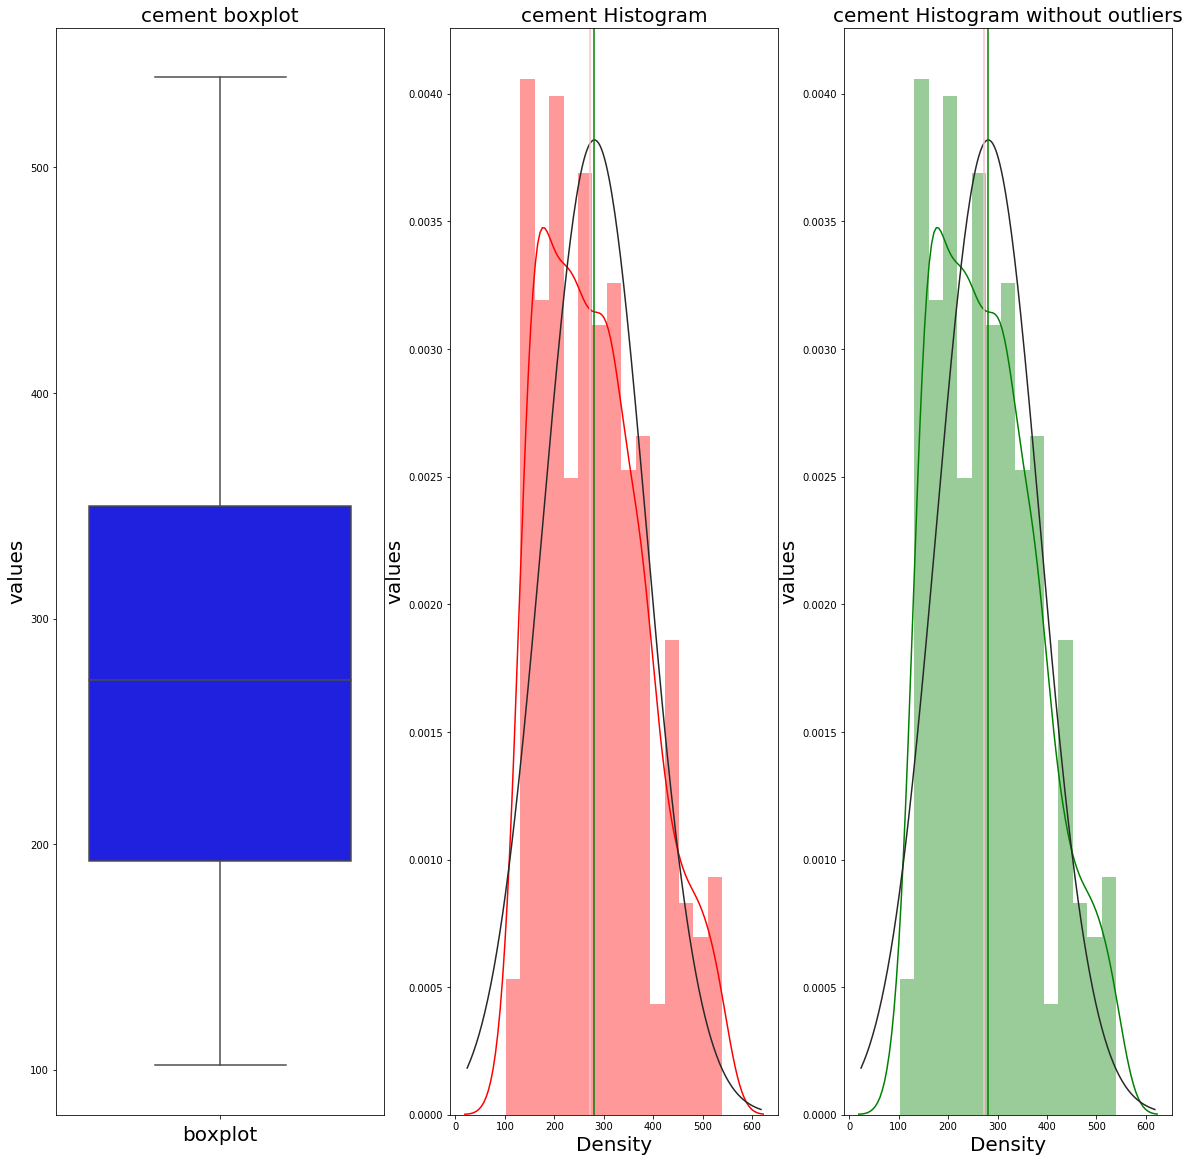

The slag has 2outliers
Outlier percentage: 0.0
Theslag has outlier values: [359.4 359.4]


918    359.4
990    359.4
Name: slag, dtype: float64

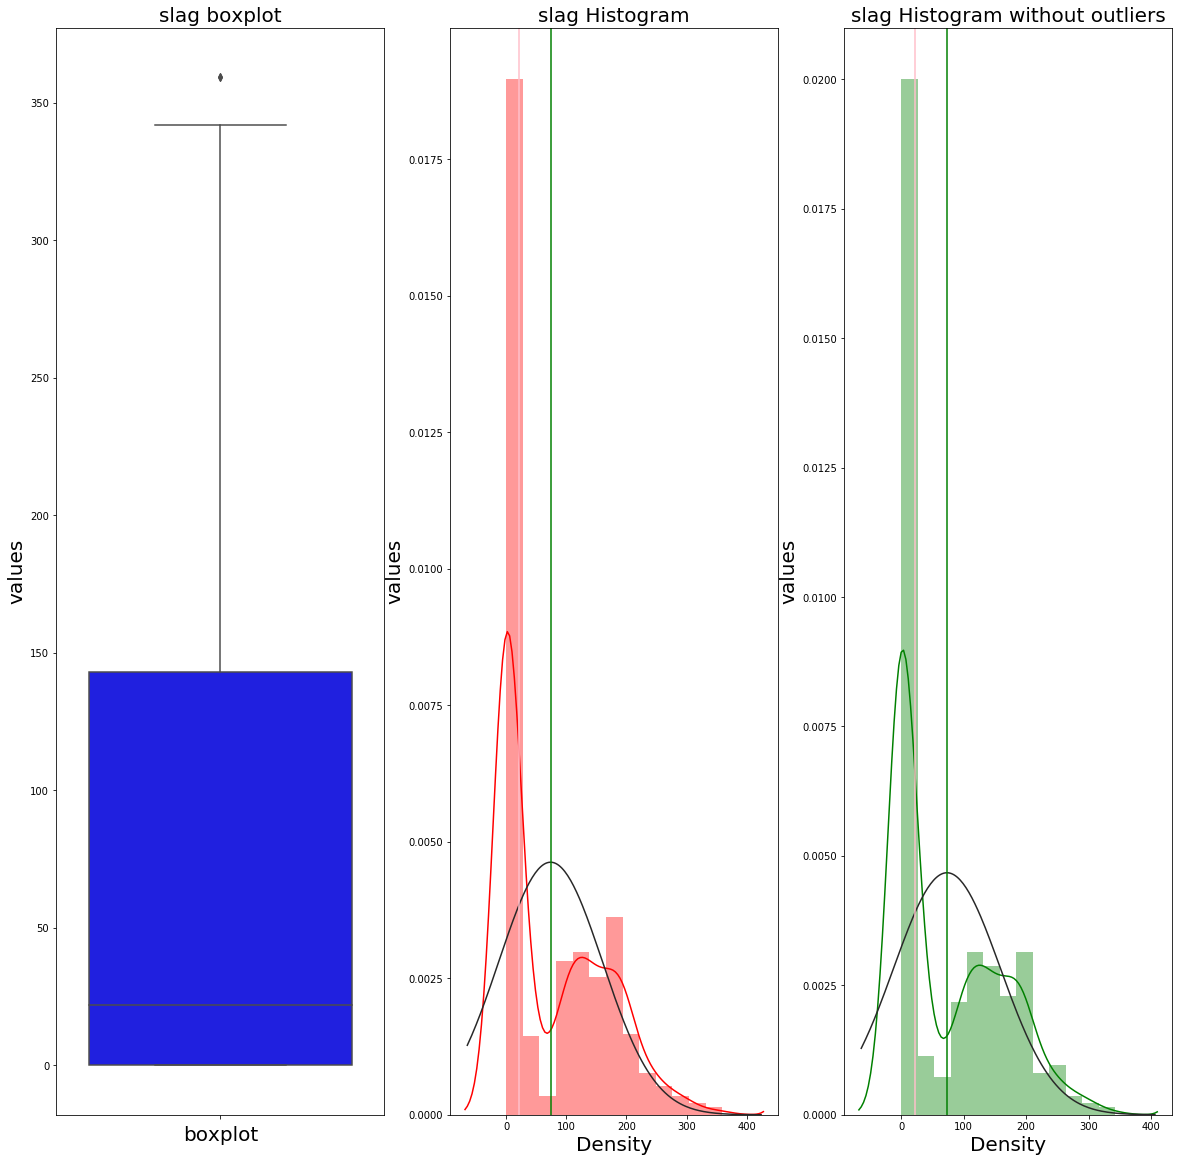

Theash has no outlier


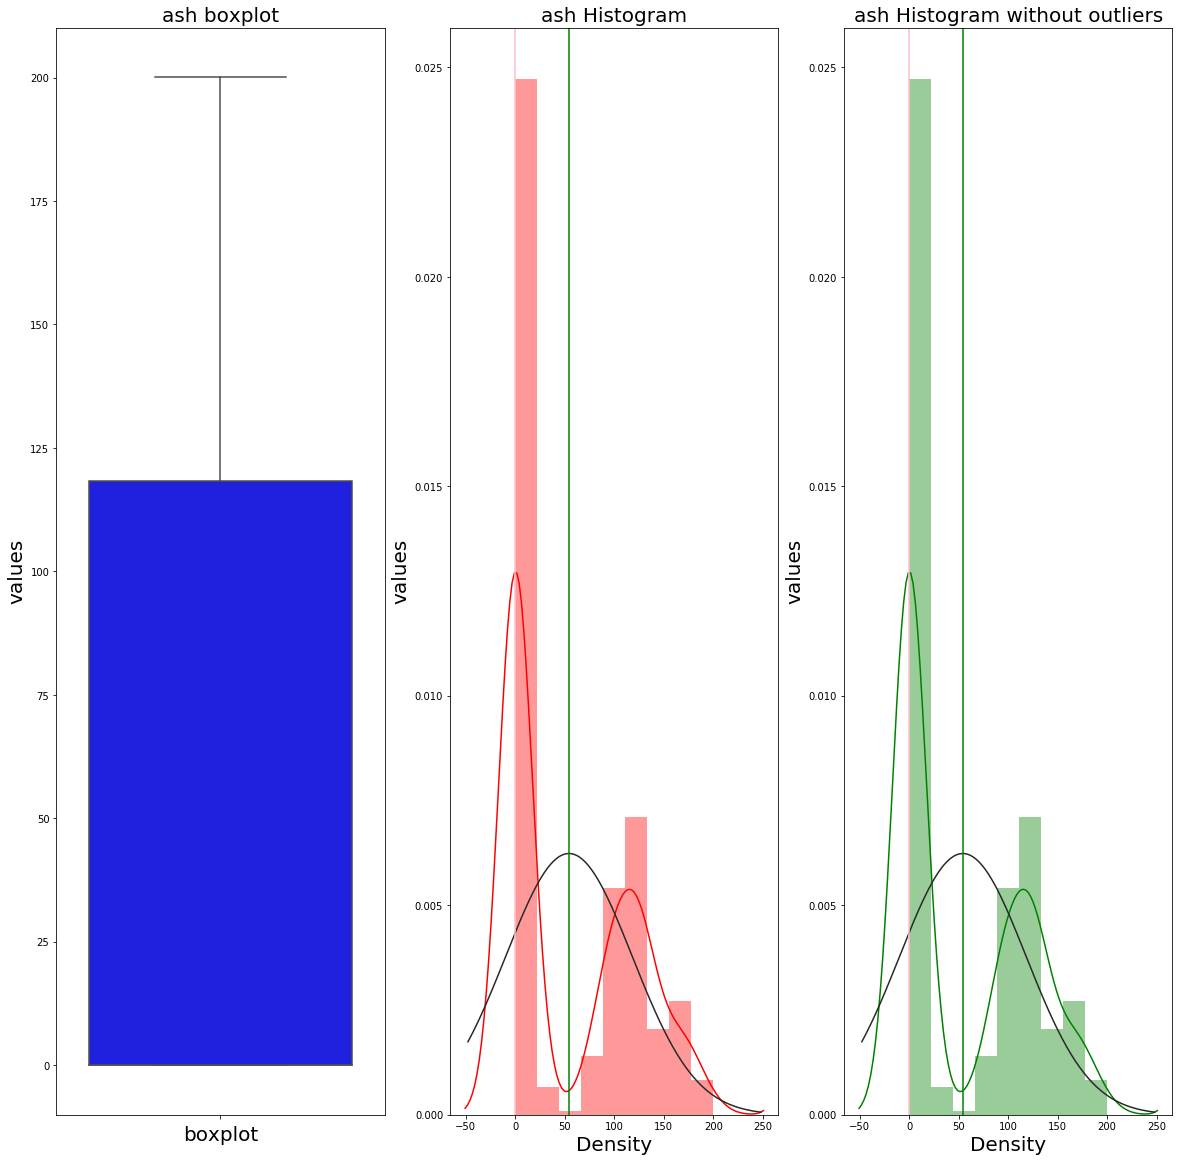

The water has 9outliers
Outlier percentage: 0.01
Thewater has outlier values: [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]


66     247.0
263    246.9
432    121.8
462    121.8
587    121.8
740    237.0
789    121.8
826    236.7
914    121.8
Name: water, dtype: float64

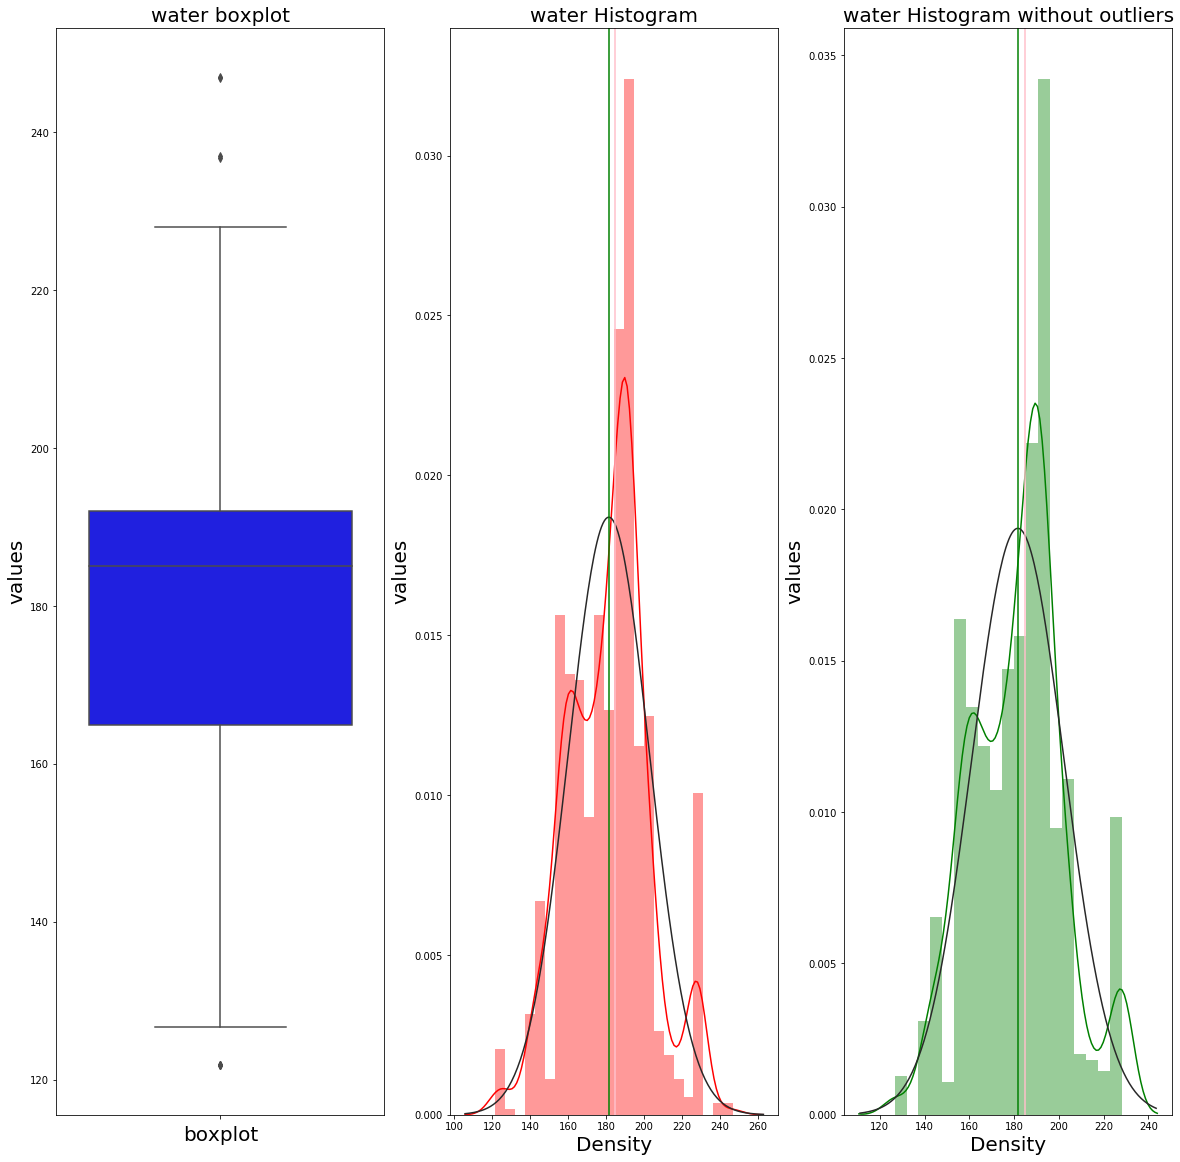

The superplastic has 10outliers
Outlier percentage: 0.01
Thesuperplastic has outlier values: [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]


44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

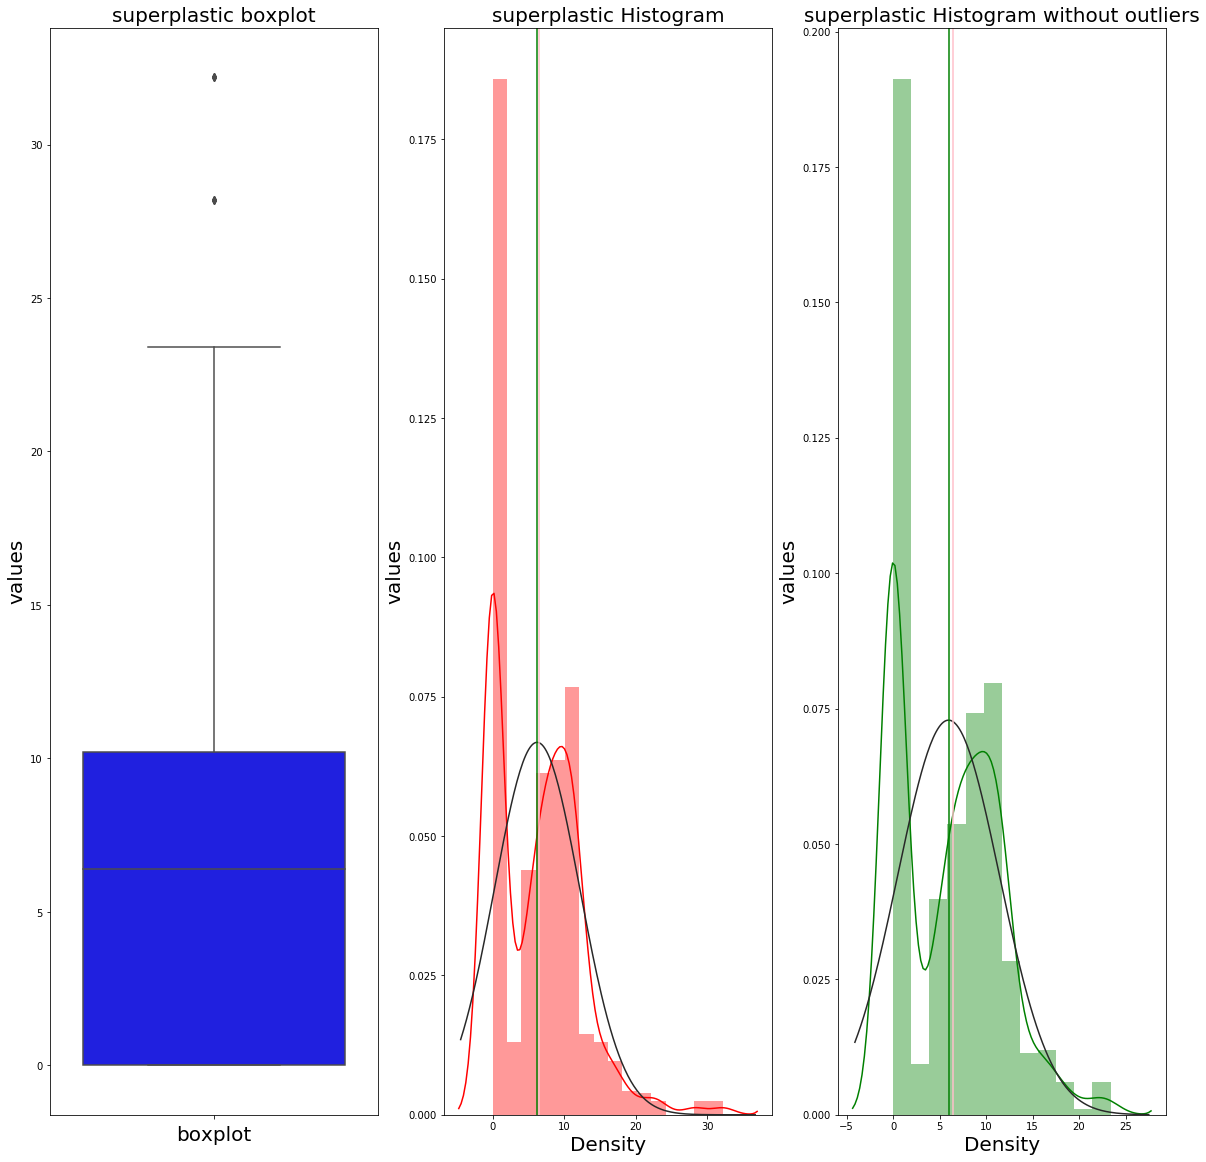

Thecoarseagg has no outlier


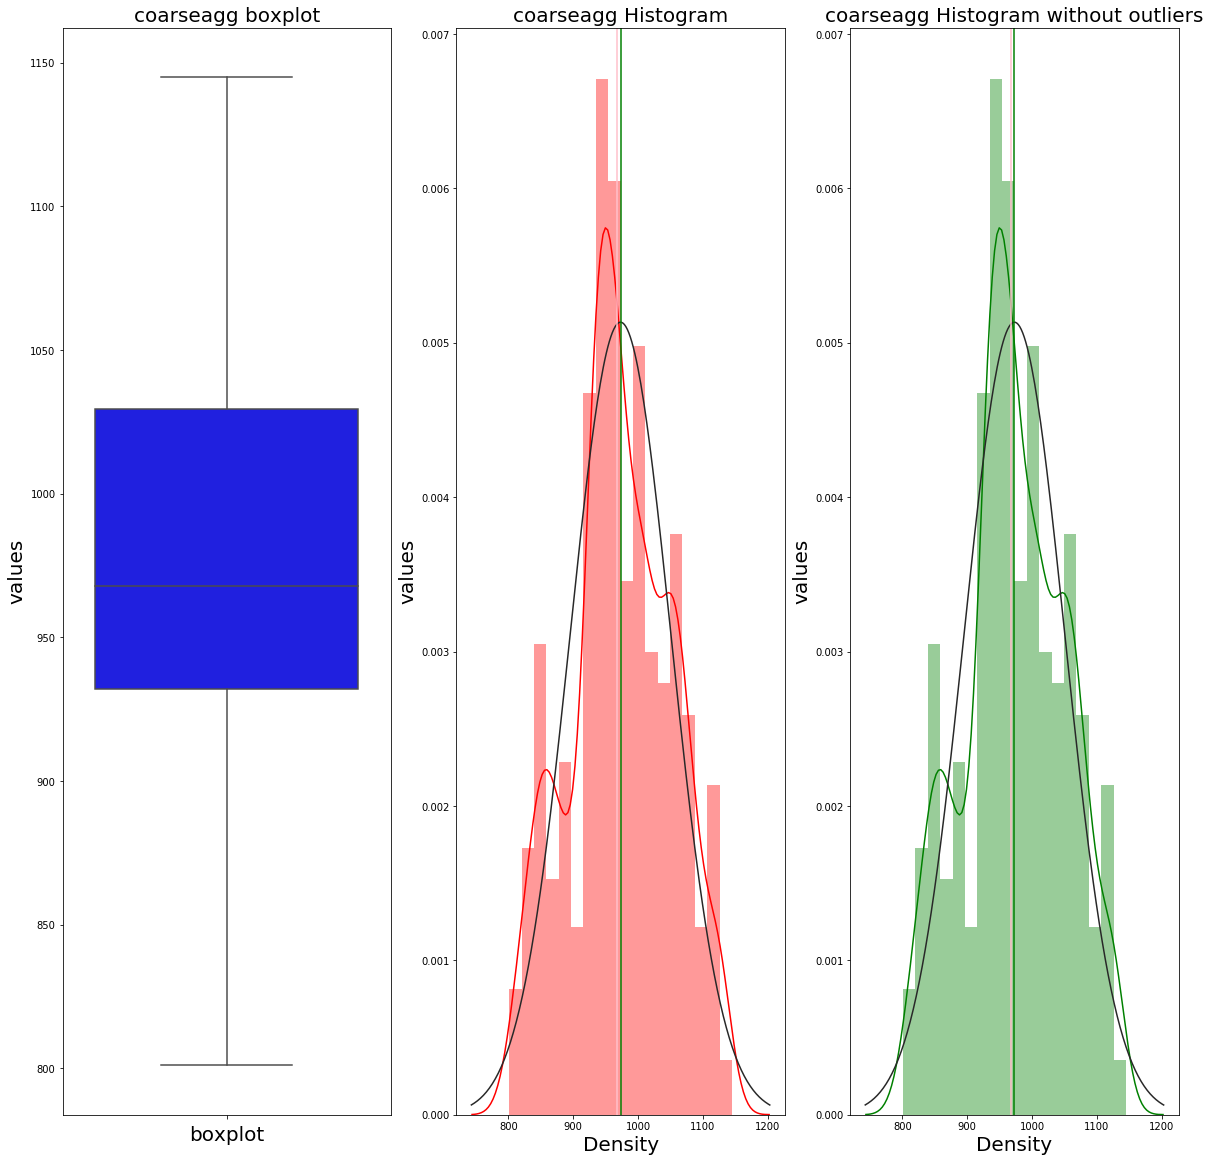

The fineagg has 5outliers
Outlier percentage: 0.0
Thefineagg has outlier values: [992.6 992.6 992.6 992.6 992.6]


129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64

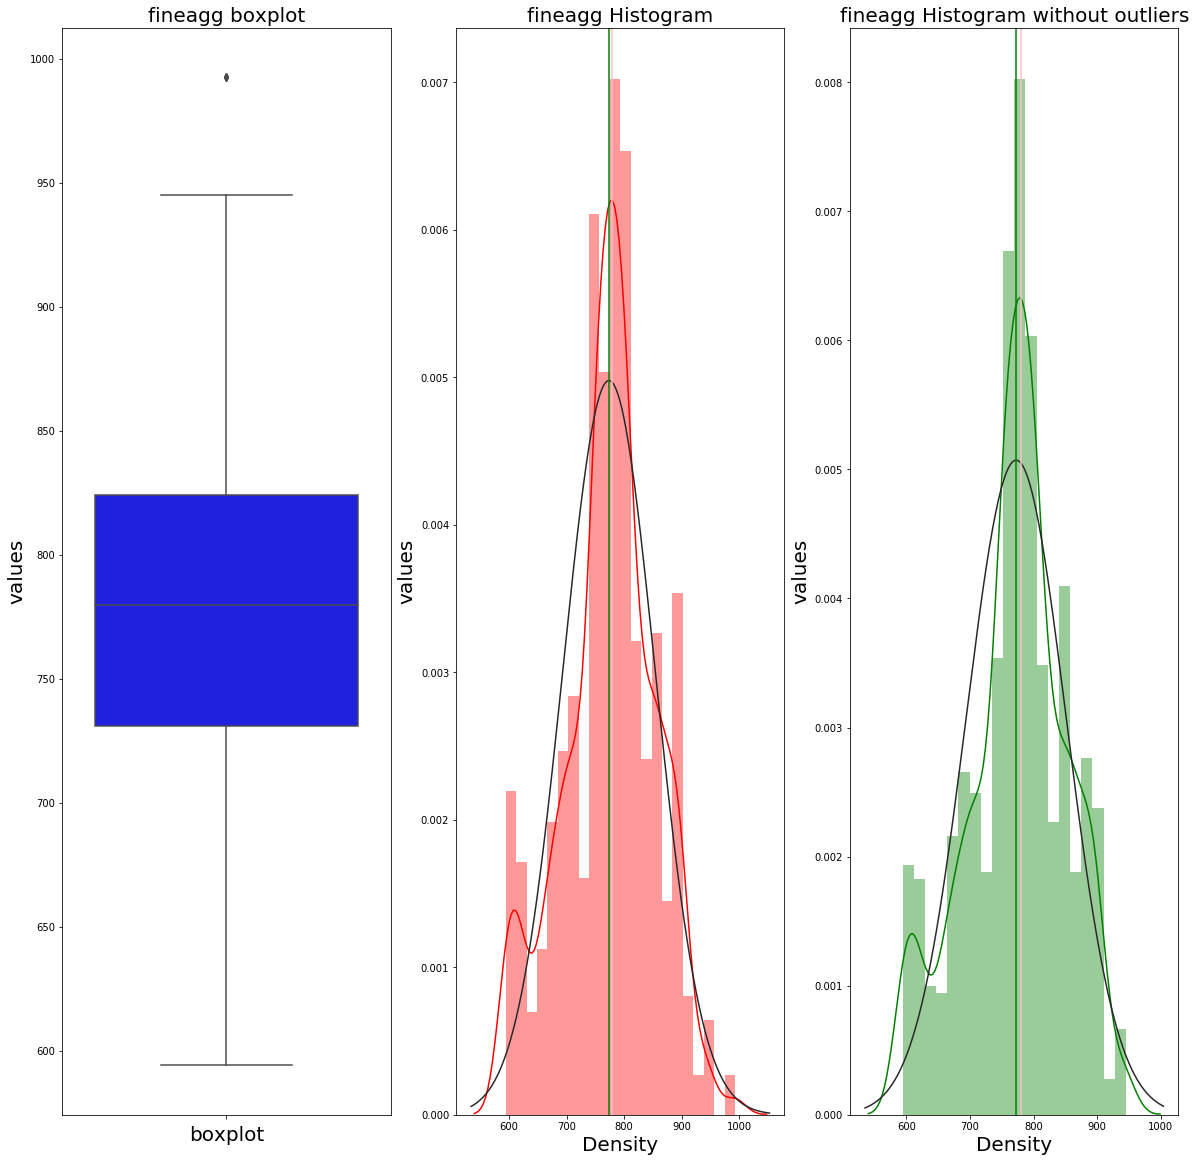

The age has 59outliers
Outlier percentage: 0.06
Theage has outlier values: [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]


51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365
721     180
754     365
755     360
776     180
850     270
861     180
878     270
900     180
901     365
919     360
951     270
957     365
971     180
985     180
995     365
1017    180
1028    270
Name: age, dtype: int64

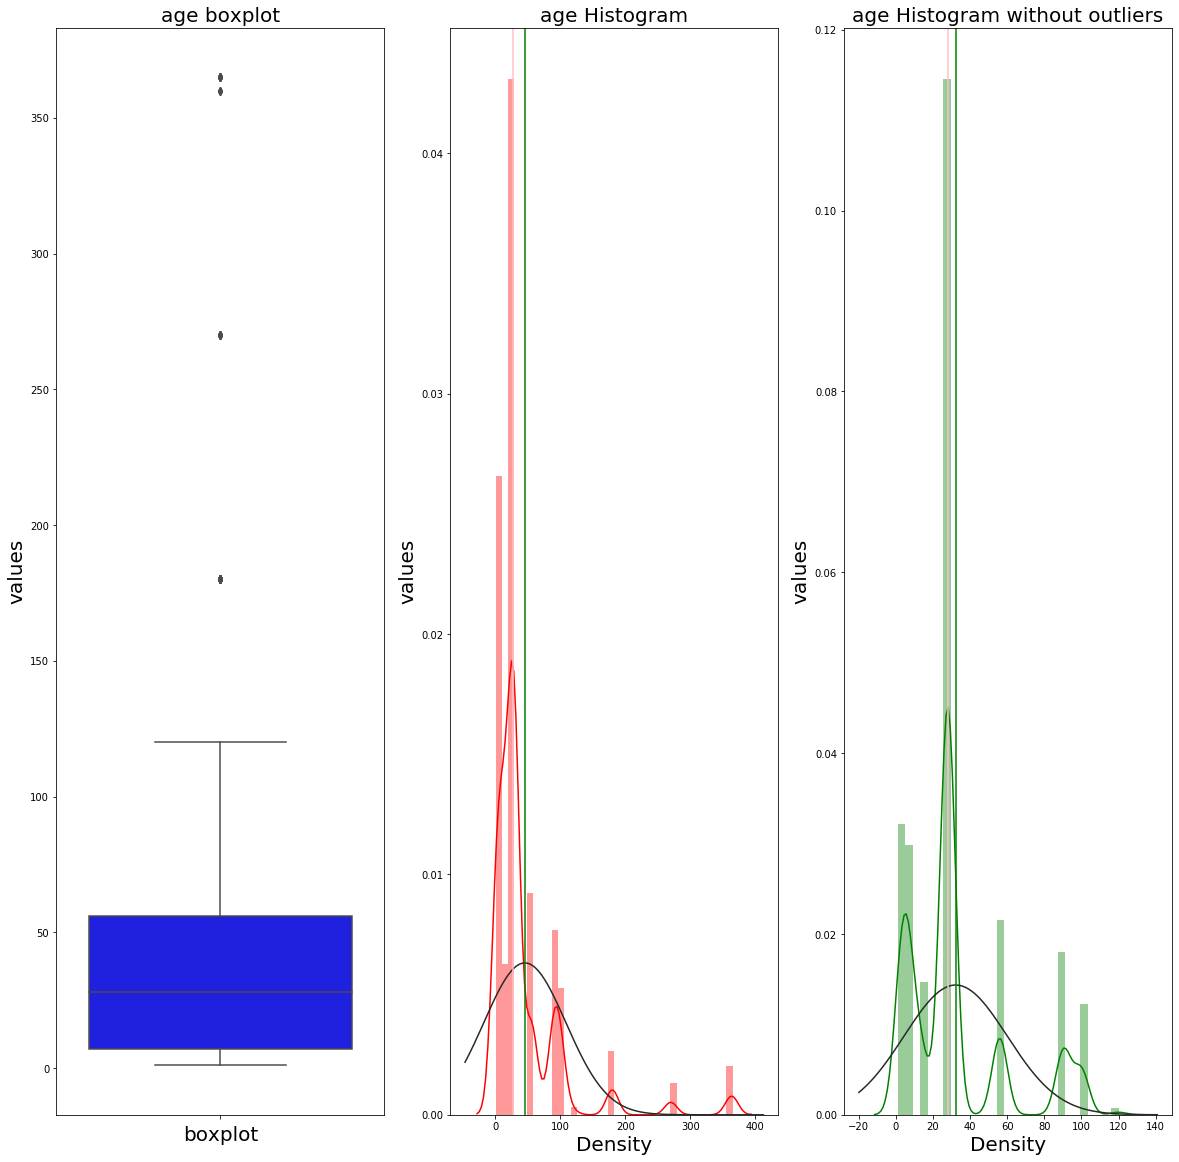

The strength has 4outliers
Outlier percentage: 0.0
Thestrength has outlier values: [79.99 80.2  81.75 82.6 ]


192     81.75
732     79.99
950     82.60
1003    80.20
Name: strength, dtype: float64

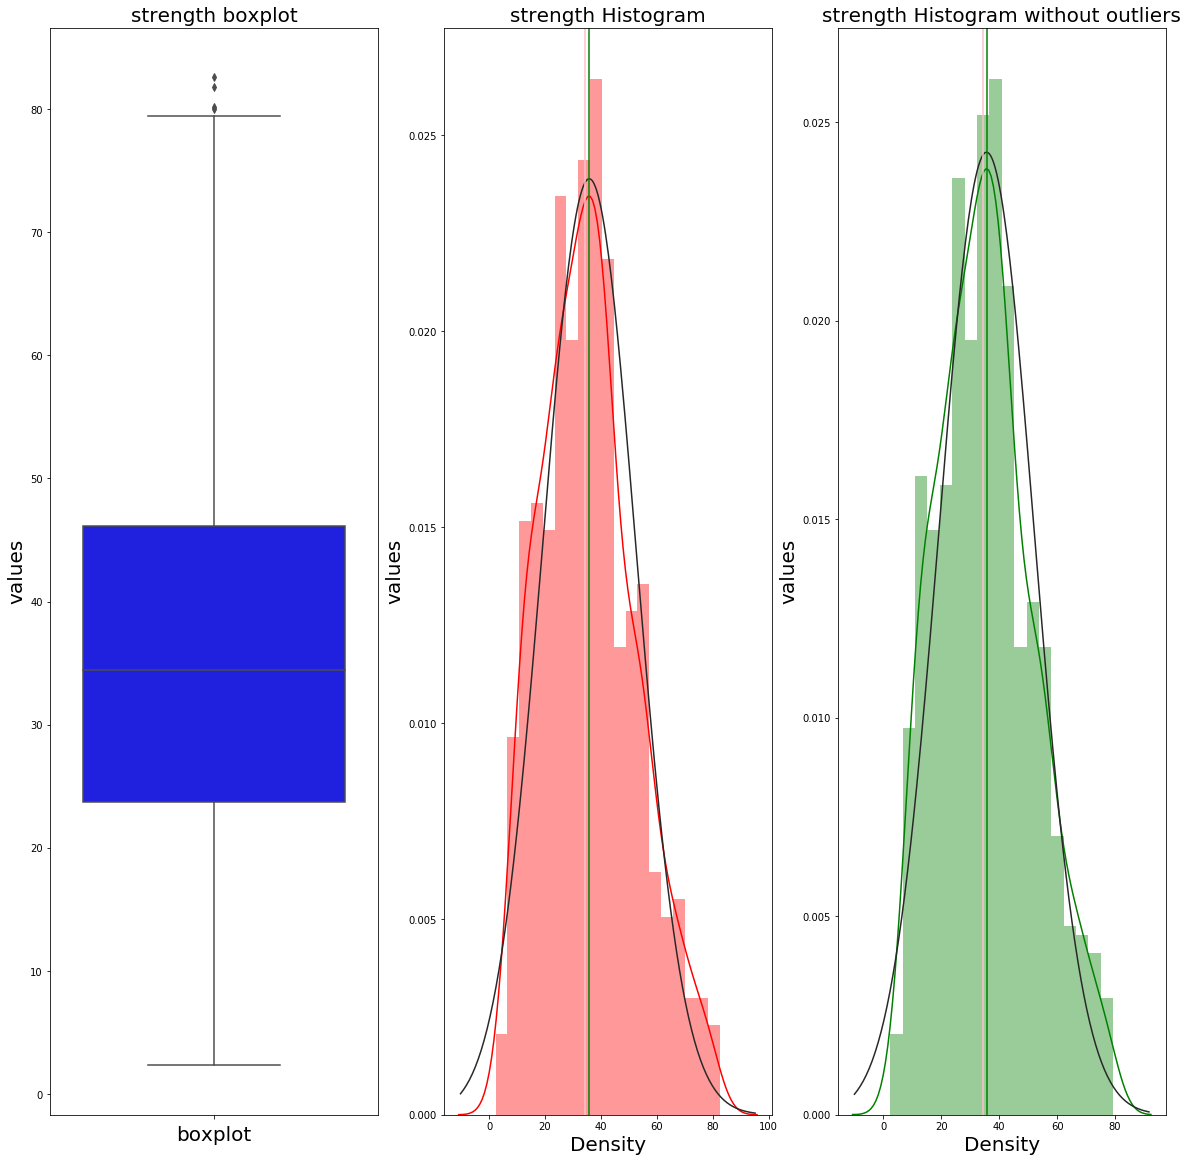

In [48]:
for x in data:
    odt_plots(data,x)

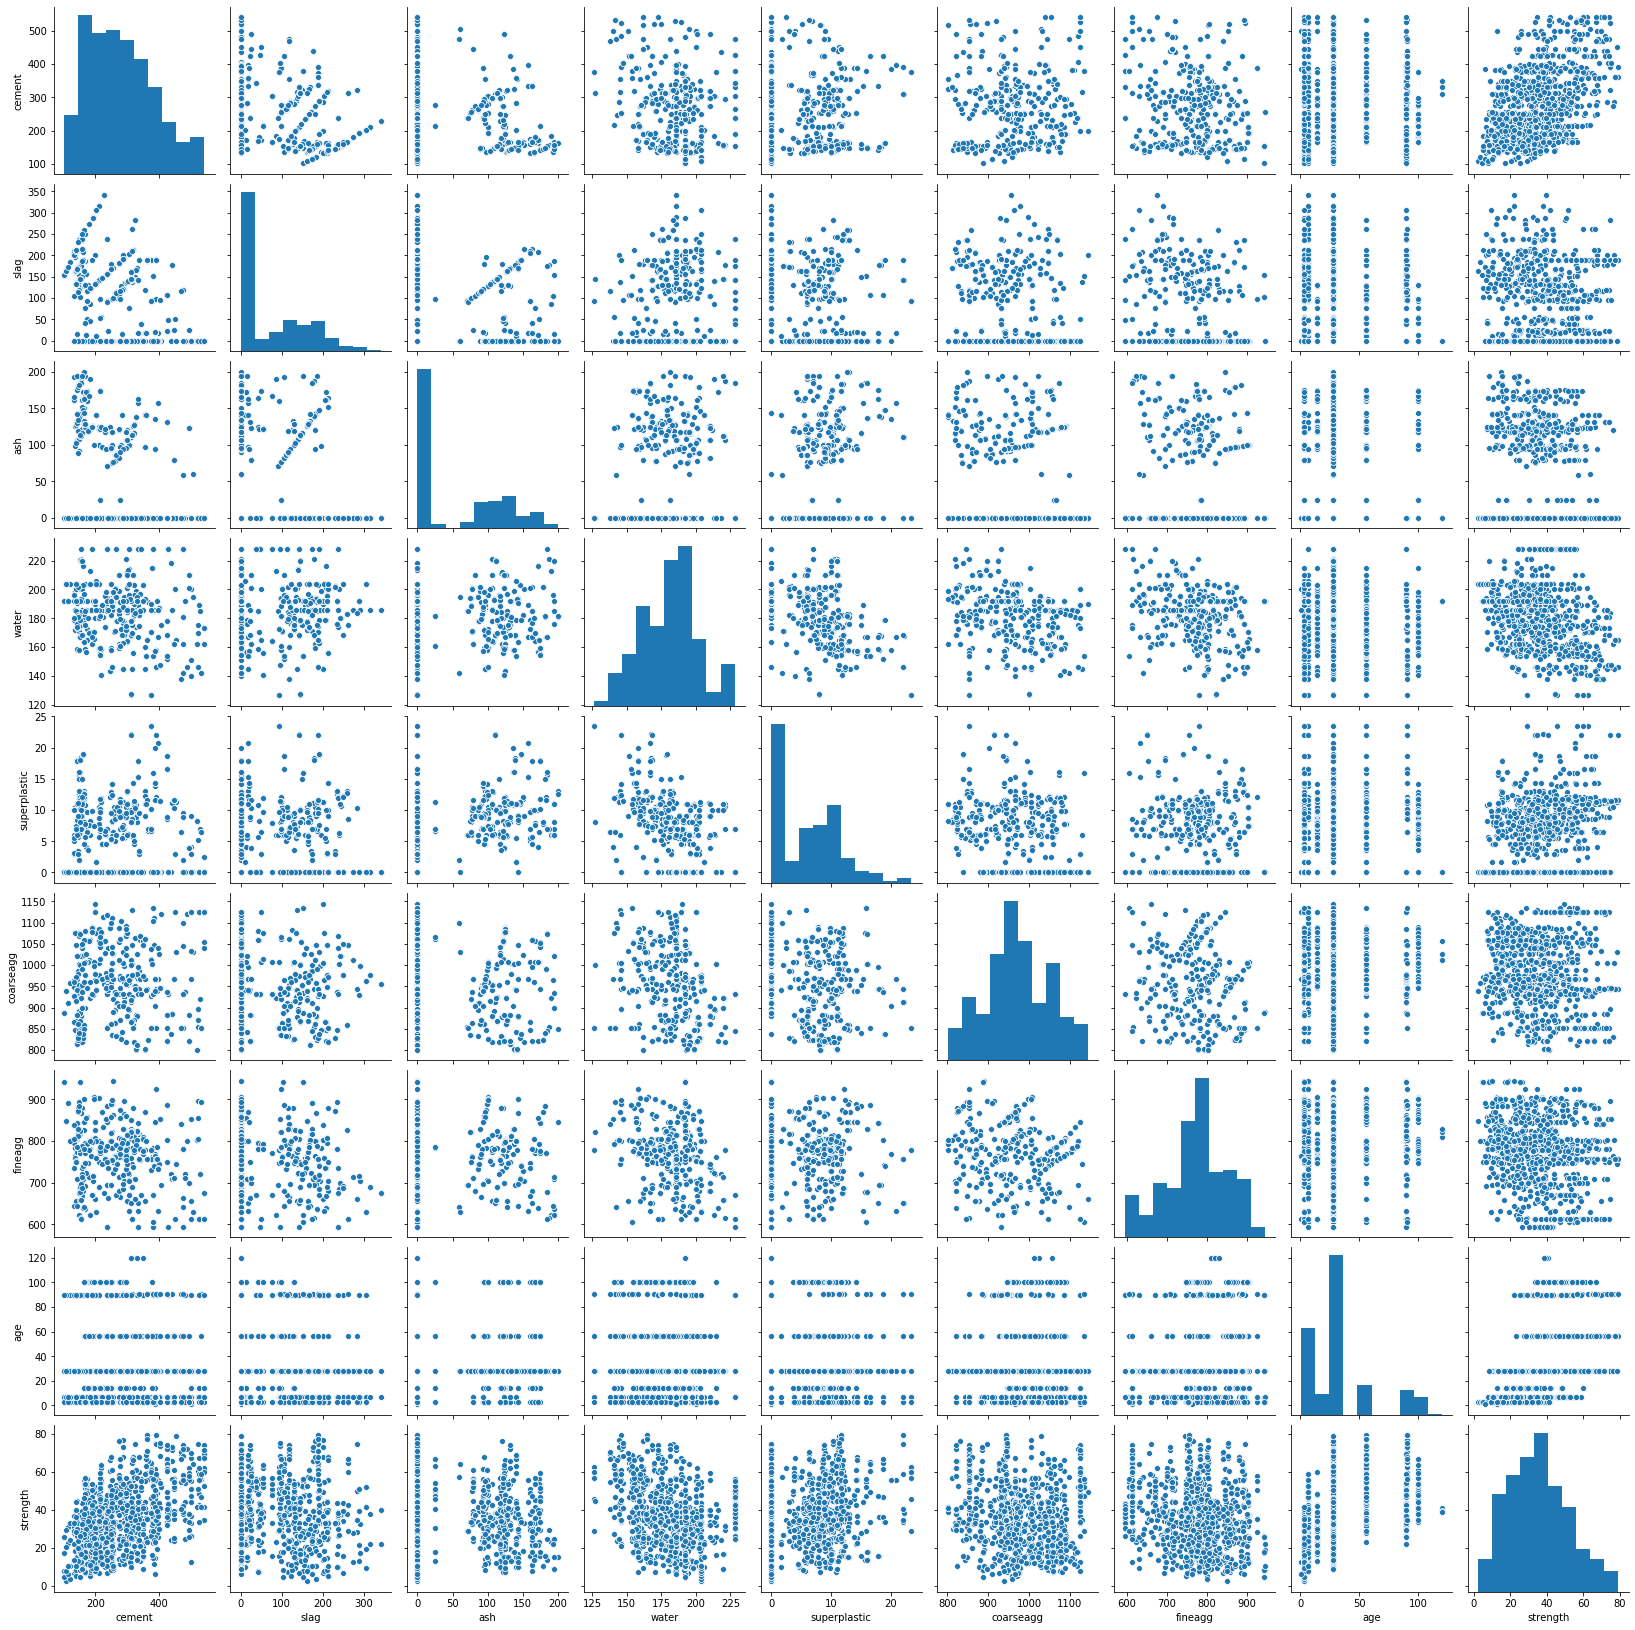

In [49]:
sns.pairplot(data)

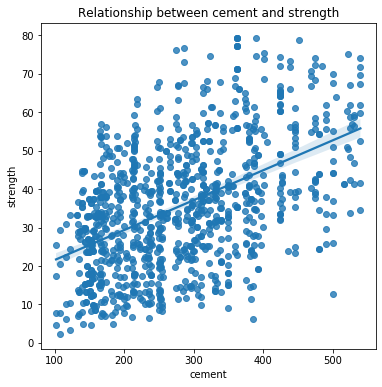

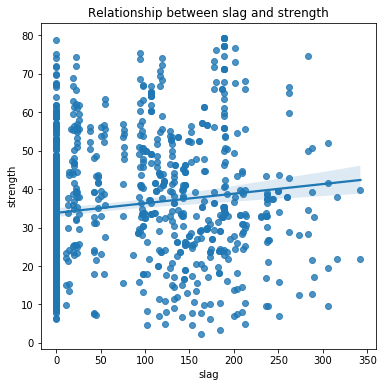

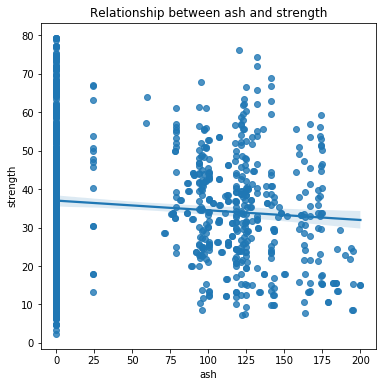

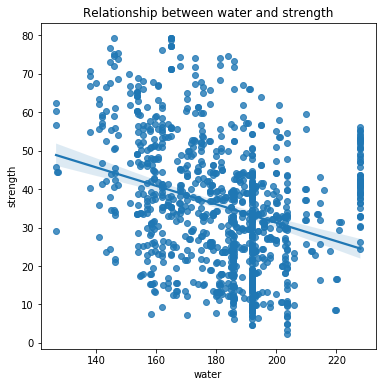

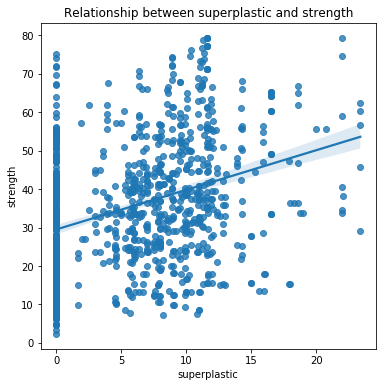

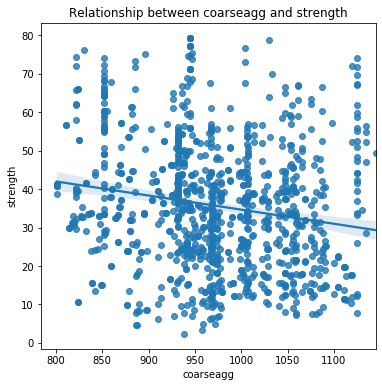

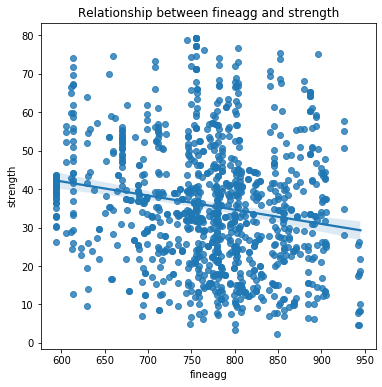

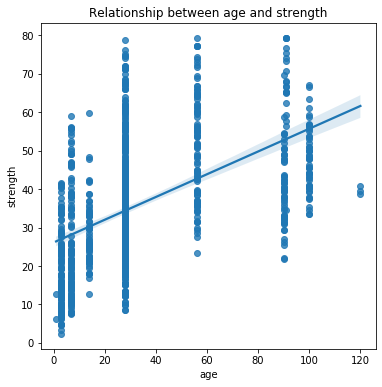

In [50]:
# Multivariate analysis using regression plot
for col in data.columns:                     #to show negative/positive correlation
    if col != 'strength':
        f,ax1 = plt.subplots(figsize = (6,6))
        sns.regplot(x=data[col], y = data['strength'],ax=ax1).set_title(f'Relationship between {col} and strength')

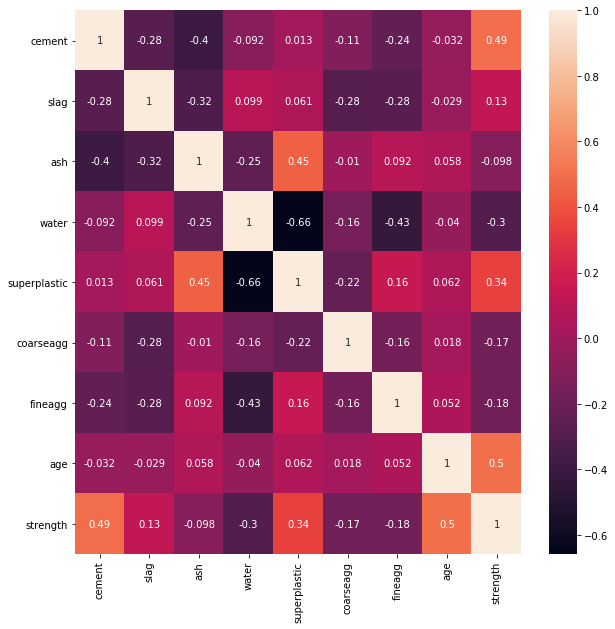

In [51]:
#Building a heatmap
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)

In [52]:
#correaltion of each variable with the target
def corr_with_target(data,tcol):
    ind_var = data.drop([tcol],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index = ['Variables','Correlation']).T.sort_values('Correlation',ascending = False)
    return result

In [53]:
corr_with_target(data,'strength')

Variables Correlation
7           age    0.499711
0        cement    0.493518
4  superplastic    0.342633
1          slag    0.129561
2           ash  -0.0979725
5     coarseagg   -0.173234
6       fineagg   -0.176113
3         water   -0.300043

In [54]:
# Variance inflation factor
#Most important methods to find multicollinearity
#VIF = 1/(1-R square)
#If value(VIF) > 5 , then the data is highly multicollinear
#Steps in VIF
#1. Regress every independent variable with all other independent variables
#2. Observe the r2 values 
#3. Calculate the VIF 

In [55]:
def vif_corr(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['VIF factor'] = [variance_inflation_factor(ind_var.values,i)for i in range(ind_var.shape[1])]
    result['Features'] = ind_var.columns
    return result.sort_values('VIF factor',ascending = False)

In [56]:
vif_corr(data.drop('strength',axis=1))

VIF factor      Features
5   86.938582     coarseagg
3   81.963087         water
6   68.664404       fineagg
0   14.291158        cement
4    5.724145  superplastic
2    4.415840           ash
1    3.342314          slag
7    2.368372           age

In [57]:
# Applying PCA
def apply_pca(x):
    
    col = []
    n_comp = len(x.columns)
    
    
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    
    
    from sklearn.decomposition import PCA
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            n_comp = i
            break
            
    print('Explained variance ratio is', evr)
    
    for j in range(1,n_comp+1):
        col.append('pc' + str(j))
        
        
    result = pd.DataFrame(p_comp,columns = col)
    
    return result

In [58]:
transformed_df = apply_pca(data.drop('strength',axis = 1))

Explained variance ratio is [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [59]:
transformed_df

pc1       pc2       pc3       pc4       pc5       pc6
0     1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110
1    -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061
2    -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045
3     2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548
4     0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228
...        ...       ...       ...       ...       ...       ...
1025 -1.743036  0.071059 -1.492203  0.045227 -0.449481  0.968953
1026 -1.079147 -0.572265  3.269799 -1.669125 -0.962953  0.002303
1027 -0.494143  1.276989  0.318398 -0.053272 -0.153787  0.751019
1028  2.688411 -0.236744  0.056551 -0.088955  0.105206  1.368321
1029  1.824507 -2.656185  1.641783  1.924398 -0.624415 -0.394357

[1030 rows x 6 columns]

In [60]:
transformed_df = transformed_df.join(data['strength'],how='left')

In [61]:
transformed_df

pc1       pc2       pc3       pc4       pc5       pc6  strength
0     1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1    -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2    -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3     2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4     0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29
...        ...       ...       ...       ...       ...       ...       ...
1025 -1.743036  0.071059 -1.492203  0.045227 -0.449481  0.968953     13.29
1026 -1.079147 -0.572265  3.269799 -1.669125 -0.962953  0.002303     41.30
1027 -0.494143  1.276989  0.318398 -0.053272 -0.153787  0.751019     44.28
1028  2.688411 -0.236744  0.056551 -0.088955  0.105206  1.368321     55.06
1029  1.824507 -2.656185  1.641783  1.924398 -0.624415 -0.394357     52.61

[1030 rows x 7 columns]

In [62]:
# Proceeding for model building
#1.Normal model building with train test split
#2.Cross validation
#3.Hyperparameter tuning

In [63]:
def train_and_test_split(data,tcol,test_size=0.3):
    
    x = data.drop(tcol,axis=1)
    y = data[tcol]
    
    
    return train_test_split(x,y,test_size=test_size,random_state=100)
    

In [64]:
def build_model(model_name,m,data,tcol):
    
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    
    result = [model_name,rmse,r2score]
    
    
    return result
    
    

In [65]:
lr = LinearRegression()

In [66]:
build_model('Linear Regression',lr,transformed_df,'strength')

['Linear Regression', 9.510886873673916, 0.6519519960039926]

In [67]:
# Building multiple models
def mul_model(data,tcol):
    col = ['Model name','RMSE','R2score']
    result = pd.DataFrame(columns = col)
    result.loc[len(result)] = build_model('Linear Regression',LinearRegression(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Lasso',Lasso(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ridge Regression',Ridge(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Decision Tree Regressor',DecisionTreeRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('SVM',SVR(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ada Boost Regressor',AdaBoostRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Knn',KNeighborsRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Gradient Boosting Regressor',GradientBoostingRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Random Forest Regressor',RandomForestRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('XGBRegressor',XGBRegressor(),transformed_df,'strength')
    return result
    

In [68]:
mul_model(transformed_df,'strength')

Model name      RMSE   R2score
0            Linear Regression  9.510887  0.651952
1                        Lasso  9.426183  0.658124
2             Ridge Regression  9.508918  0.652096
3      Decision Tree Regressor  8.926901  0.693381
4                          SVM  9.107654  0.680839
5          Ada Boost Regressor  8.439645  0.725940
6                          Knn  8.046481  0.750880
7  Gradient Boosting Regressor  7.083570  0.806936
8      Random Forest Regressor  6.710117  0.826756
9                 XGBRegressor  6.613111  0.831729

In [69]:
#Building model with cross validation

def kfold_cv(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv = fold)
    score_svm = cross_val_score(SVR(),x,y,cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(),x,y,cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv = fold)
    score_ls = cross_val_score(Lasso(),x,y,cv = fold)
    score_rd = cross_val_score(Ridge(),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv = fold)
    score_gboost = cross_val_score(GradientBoostingRegressor(),x,y,cv = fold)
    score_xgboost = cross_val_score(XGBRegressor(),x,y,cv = fold)
    
    models = [LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
    model_names = ['Linear Regression','Decision Tree Regressor','SVR','KNeighbors Regressor','Random Forest Regressor','Lasso','Ridge','AdaBoost Regressor','Gradient Boosting Regressor','XGB Regressor']
    score = [score_lr,score_dt,score_svm,score_knn,score_rf,score_ls,score_rd,score_ada,score_gboost,score_xgboost]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp_df = [m_names,score_mean,score_std]
        result.append(temp_df)
    
    result_df = pd.DataFrame(result,columns=['Model names','Score mean','Score STD'])
    
    return result_df.sort_values('Score mean',ascending = False)
    

In [70]:
kfold_cv(transformed_df.drop('strength',axis=1),transformed_df['strength'])

Model names  Score mean  Score STD
9                XGB Regressor    0.873262   0.036061
4      Random Forest Regressor    0.867613   0.028514
8  Gradient Boosting Regressor    0.829290   0.050283
3         KNeighbors Regressor    0.767731   0.055625
1      Decision Tree Regressor    0.763578   0.061628
7           AdaBoost Regressor    0.730506   0.035098
2                          SVR    0.703117   0.042765
6                        Ridge    0.663935   0.059437
0            Linear Regression    0.663928   0.059476
5                        Lasso    0.649837   0.049887

In [71]:
#HyperParameter tuning
def tuning_model(x,y,fold=10):
    
    #lISTING THE PARAMETERS
    param_las = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,0,1,2,4,6,8,9,12,14,15,75,150,300,450,500,600,625.700,900,975]}
    param_rid = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,0,1,2,4,6,8,9,12,14,15,75,150,300,450,500,600,625.700,900,975]}
    param_svm = {'kernel':['linear','rbf','sigmoid','poly'],'gamma':['scale','auto']}
    param_rf = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400,500,600,700,800,900,1000]}
    param_knn = {'n_neighbors':[0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400,500,600,700,800,900,1000]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,1000],'reg_lambda':[0,1]}
    
    #hYPERPARAMETER TUNING USING GRID SEARCH CSV
    tune_lasso = GridSearchCV(Lasso(),param_las,cv=fold)
    tune_ridge = GridSearchCV(Ridge(),param_rid,cv=fold)
    tune_svm = GridSearchCV(SVR(),param_svm,cv=fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
    tune_knn = GridSearchCV(KNeighborsRegressor(),param_knn,cv=fold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=fold)
    
    tune_lasso.fit(x,y)
    tune_ridge.fit(x,y)
    tune_svm.fit(x,y)
    tune_rf.fit(x,y)
    tune_knn.fit(x,y)
    tune_xg.fit(x,y)
    
    
    tuned = [tune_lasso,tune_ridge,tune_svm,tune_rf,tune_knn,tune_xg]
    names = ['Lasso','Ridge','SVM','Random forest','KNN','XGB Regressor']
    
    for i in range(0,len(tuned)):
        print('Model',names[i])
        print('Best value',tuned[i].best_params_)
        
    
    
    

In [72]:
#tuning_model(transformed_df.drop('strength',axis=1),transformed_df['strength'])

In [73]:
#Building the model usin hyperparameter
def kfold_cv_hyperparameter_tuned(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv = fold)
    score_svm = cross_val_score(SVR(gamma = 'scale', kernel = 'rbf'),x,y,cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 4),x,y,cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators = 400),x,y,cv = fold)
    score_ls = cross_val_score(Lasso(alpha= 0.01),x,y,cv = fold)
    score_rd = cross_val_score(Ridge(alpha = 6),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv = fold)
    score_gboost = cross_val_score(GradientBoostingRegressor(),x,y,cv = fold)
    score_xgboost = cross_val_score(XGBRegressor(),x,y,cv = fold)
    
    models = [LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
    model_names = ['Linear Regression','Decision Tree Regressor','SVR','KNeighbors Regressor','Random Forest Regressor','Lasso','Ridge','AdaBoost Regressor','Gradient Boosting Regressor','XGB Regressor']
    score = [score_lr,score_dt,score_svm,score_knn,score_rf,score_ls,score_rd,score_ada,score_gboost,score_xgboost]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp_df = [m_names,score_mean,score_std]
        result.append(temp_df)
    
    result_df = pd.DataFrame(result,columns=['Model names','Score mean','Score STD'])
    
    return result_df.sort_values('Score mean',ascending = False)

In [74]:
kfold_cv_hyperparameter_tuned(transformed_df.drop('strength',axis=1),transformed_df['strength'])

Model names  Score mean  Score STD
9                XGB Regressor    0.873262   0.036061
4      Random Forest Regressor    0.868941   0.031876
8  Gradient Boosting Regressor    0.829294   0.050495
3         KNeighbors Regressor    0.771102   0.054481
1      Decision Tree Regressor    0.760790   0.055036
7           AdaBoost Regressor    0.726372   0.040414
2                          SVR    0.703117   0.042765
5                        Lasso    0.663970   0.059370
6                        Ridge    0.663951   0.059242
0            Linear Regression    0.663928   0.059476

In [75]:
# Clustering

from sklearn.cluster import KMeans

In [76]:
x = data.drop('strength',axis=1)

In [77]:
y = data['strength']

In [78]:
labels = KMeans(n_clusters = 2 , random_state =100).fit_predict(x)

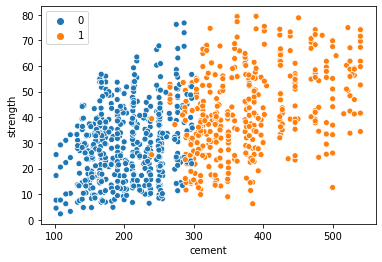

In [79]:
sns.scatterplot(x = x.cement,y = y,hue = labels)

In [80]:
def cluster_among_var(x,y,labels):
    
    columns = list(set(list(x.columns)) - set(data['strength']))
    
    r = int(len(columns)/2)
    if r%2 == 0:
        r=r
    else:
        r = r+1
        
    f,ax = plt.subplots(r,2,figsize = (15,15))
    a = 0
    
    for col in range(0,r):
        for j in range(0,2):
            if a != len(columns):
                ax[col][j].scatter(x[y],x[columns[a]],c = labels)
                ax[col][j].set_xlabel(y)
                ax[col][j].set_ylabel(columns[a])
                a = a + 1
        

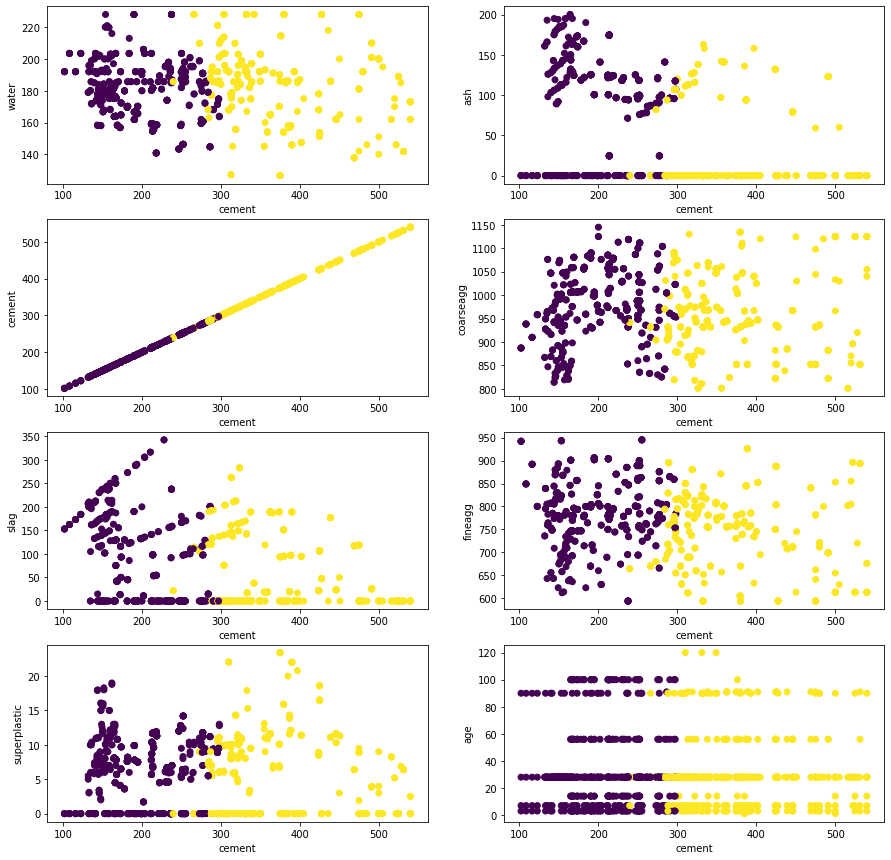

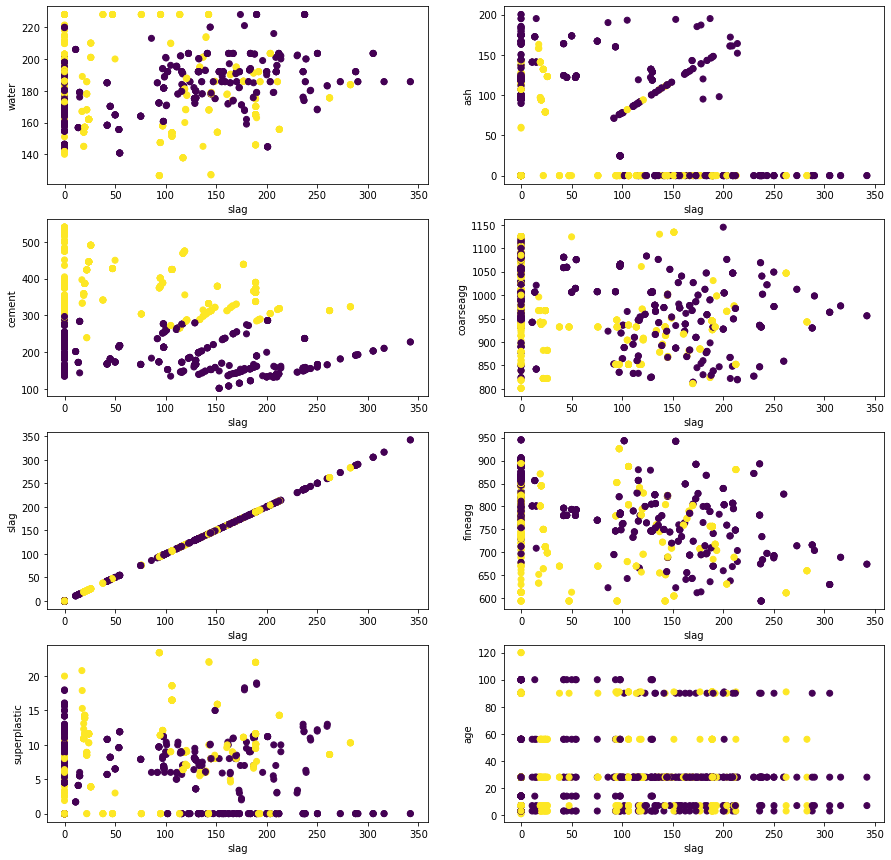

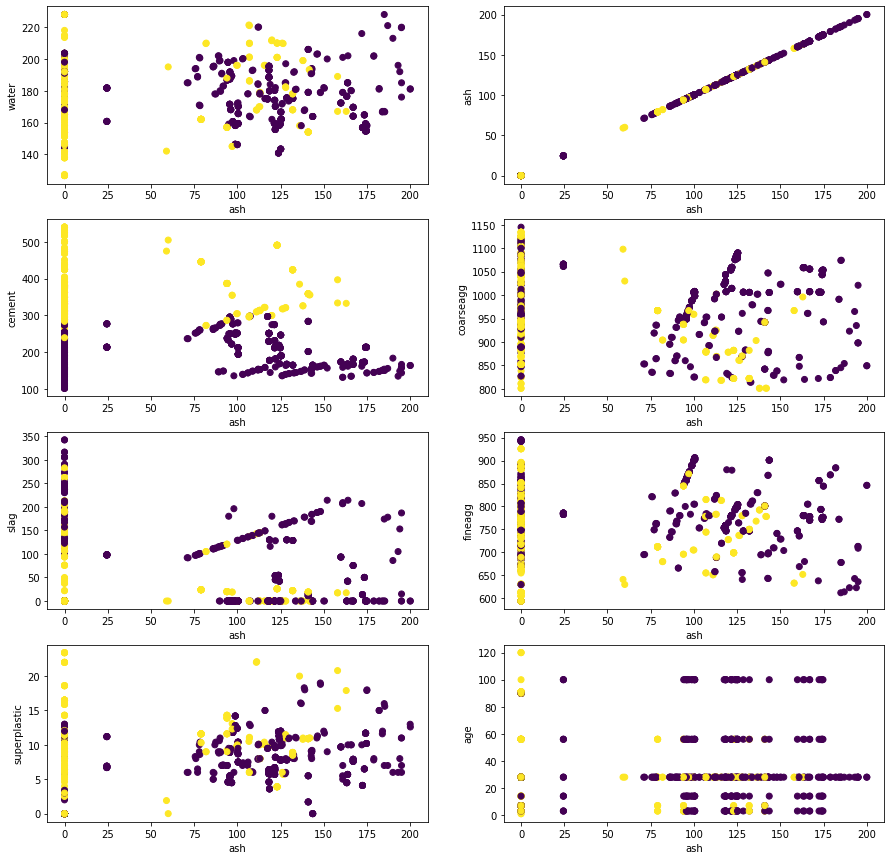

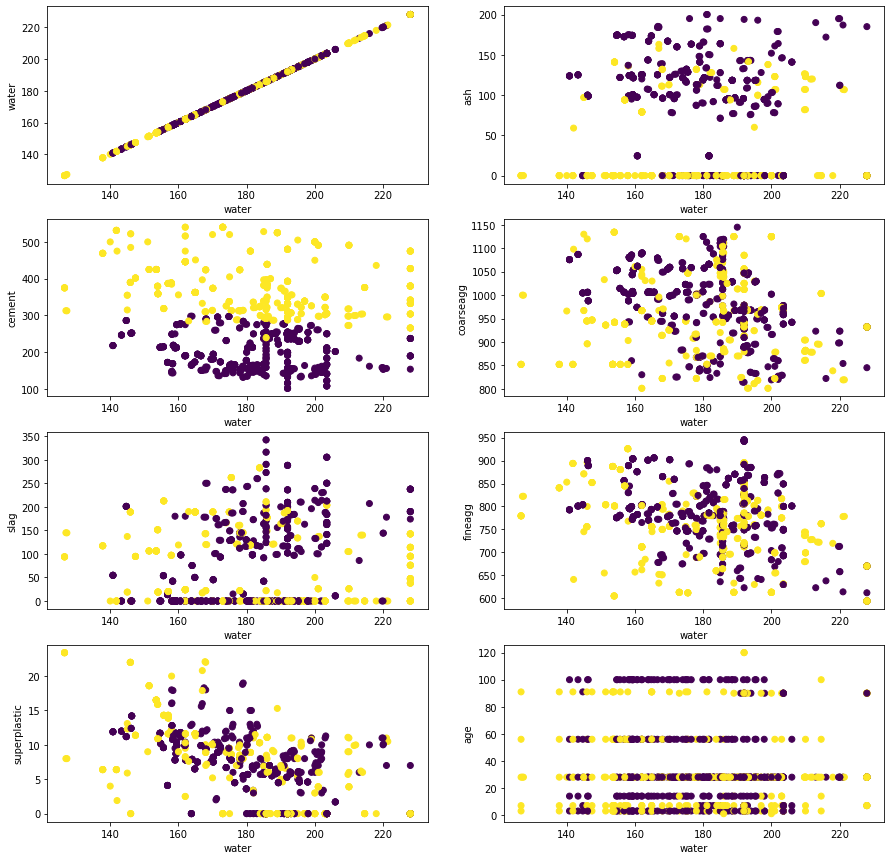

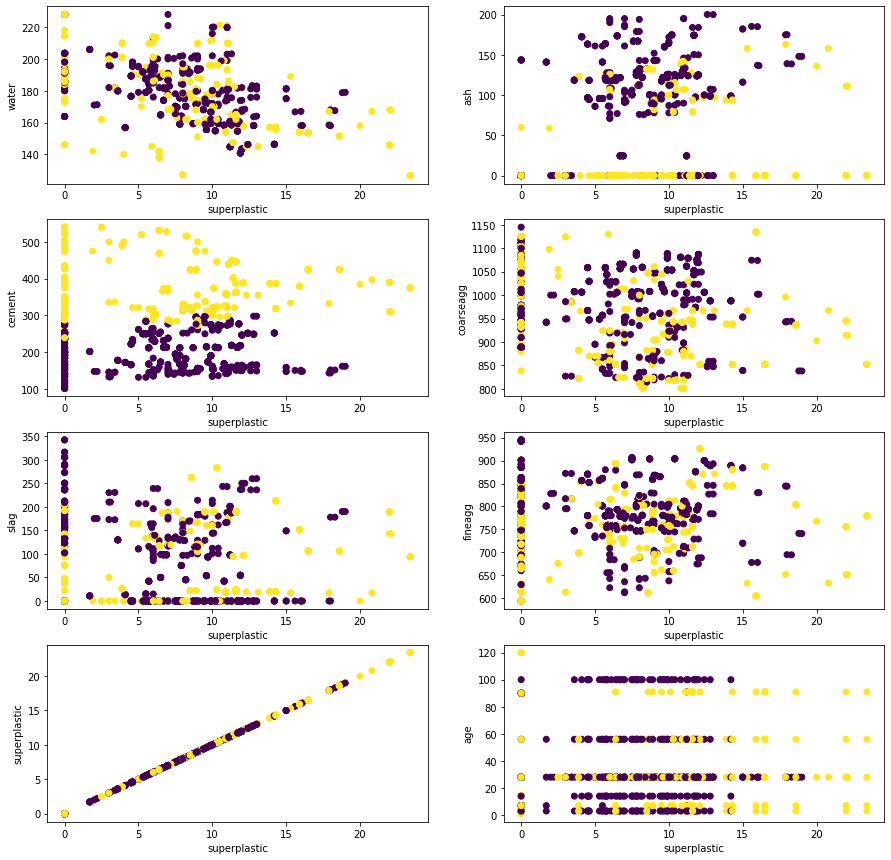

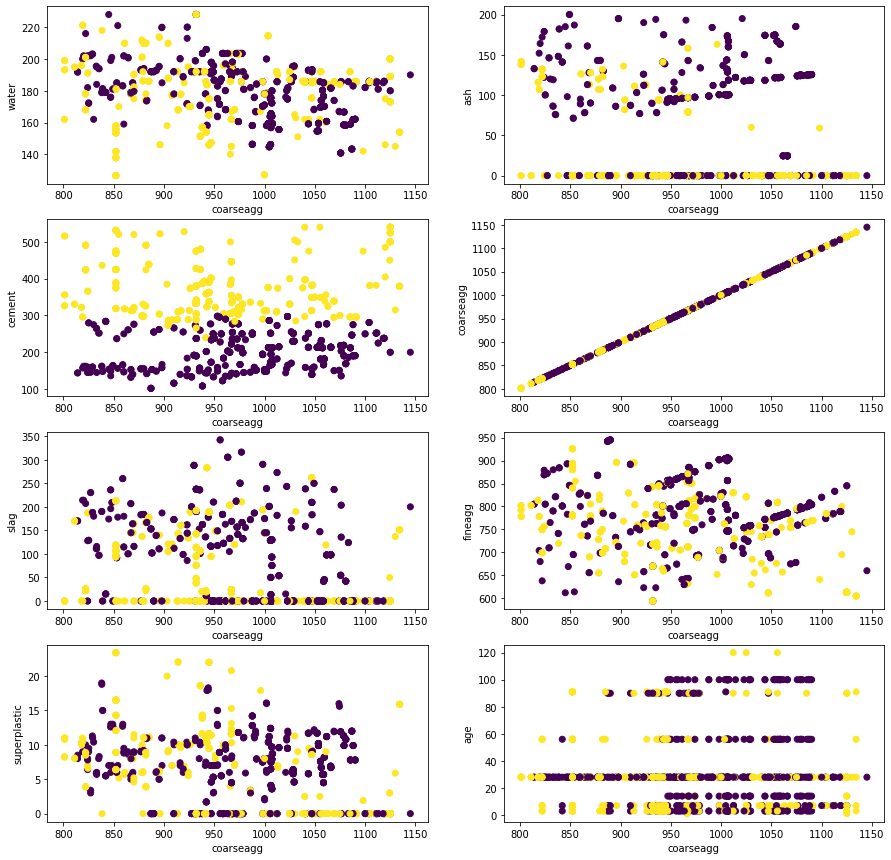

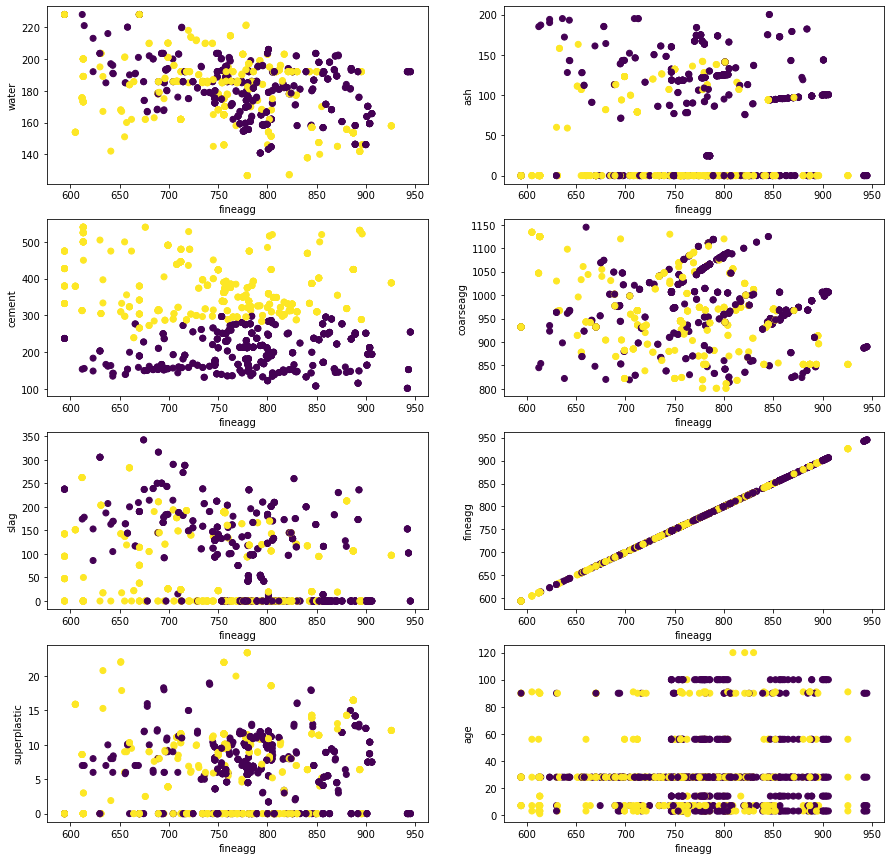

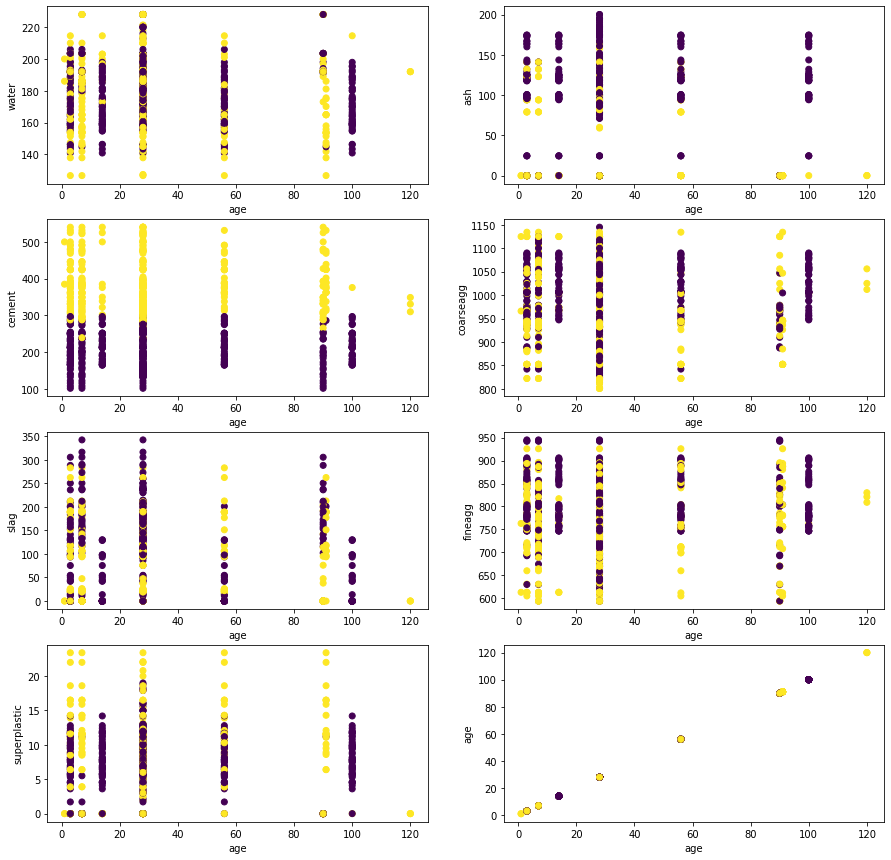

In [81]:
for col in x.columns:
    cluster_among_var(x,col,labels)

In [82]:
# observations of clustering

#Cement is forming clusters with all the variables 

In [83]:
clusters_df = data.join(pd.DataFrame(data = labels, columns = ['labels']),how = 'left')

In [84]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   
...      ...    ...    ...    ...           ...        ...      ...   ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0  28.0   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7   3.0   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3  28.0   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  28.0   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0   7.0   

      strength  labels  
0        29.89       0  
1        23.51       0  
2        29.22       0  
3        45.85       1  
4        18.29       0  
...        ...     ...  
1025     13.29       0  
1026     41.30       1  
1027     44.28       0  
1028     55.06       1  
1029     52.61       1  

[1030 rows x 10 columns]

In [85]:
centroid = clusters_df.groupby('labels')['cement'].agg(['mean','median'])

In [86]:
centroid

mean  median
labels                    
0       203.132804   202.0
1       376.731317   362.6

In [87]:
clusters_df =clusters_df.merge(centroid,on = 'labels',how= 'left')

In [88]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   
...      ...    ...    ...    ...           ...        ...      ...   ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0  28.0   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7   3.0   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3  28.0   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  28.0   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0   7.0   

      strength  labels        mean  median  
0        29.89       0  203.132804   202.0  
1        23.51       0  203.132804   202.0  
2        29.22       0  203.132804   202.0  
3        45.85       1  376.731317   362.6  
4        18.29       0  203.132804   202.0  
...        ...     ...         ...     ...  
1025     13.29       0  203.132804   202.0  
1026     41.30       1  376.731317   362.6  
1027     44.28       0  203.132804   202.0  
1028     55.06       1  376.731317   362.6  
1029     52.61       1  376.731317   362.6  

[1030 rows x 12 columns]

In [89]:
clusters_df.drop('labels',axis=1,inplace=True)

In [90]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   
...      ...    ...    ...    ...           ...        ...      ...   ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0  28.0   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7   3.0   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3  28.0   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  28.0   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0   7.0   

      strength        mean  median  
0        29.89  203.132804   202.0  
1        23.51  203.132804   202.0  
2        29.22  203.132804   202.0  
3        45.85  376.731317   362.6  
4        18.29  203.132804   202.0  
...        ...         ...     ...  
1025     13.29  203.132804   202.0  
1026     41.30  376.731317   362.6  
1027     44.28  203.132804   202.0  
1028     55.06  376.731317   362.6  
1029     52.61  376.731317   362.6  

[1030 rows x 11 columns]

In [91]:
kfold_cv_hyperparameter_tuned(clusters_df.drop('strength',axis=1),clusters_df['strength'])

Model names  Score mean  Score STD
9                XGB Regressor    0.899436   0.046856
4      Random Forest Regressor    0.888622   0.034347
8  Gradient Boosting Regressor    0.875610   0.044920
1      Decision Tree Regressor    0.835926   0.051757
7           AdaBoost Regressor    0.737005   0.034104
0            Linear Regression    0.686673   0.062387
6                        Ridge    0.686641   0.062315
5                        Lasso    0.686641   0.062314
3         KNeighbors Regressor    0.681656   0.080129
2                          SVR    0.246843   0.044778

In [92]:
kfold_cv_hyperparameter_tuned(transformed_df.drop('strength',axis=1),transformed_df['strength'])

Model names  Score mean  Score STD
9                XGB Regressor    0.873262   0.036061
4      Random Forest Regressor    0.867740   0.032325
8  Gradient Boosting Regressor    0.829119   0.050168
3         KNeighbors Regressor    0.771102   0.054481
1      Decision Tree Regressor    0.757425   0.063780
7           AdaBoost Regressor    0.727887   0.039209
2                          SVR    0.703117   0.042765
5                        Lasso    0.663970   0.059370
6                        Ridge    0.663951   0.059242
0            Linear Regression    0.663928   0.059476

In [93]:
x_train , x_test , y_train , y_test = train_and_test_split(clusters_df,'strength')

In [94]:
xgb = XGBRegressor()

In [95]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

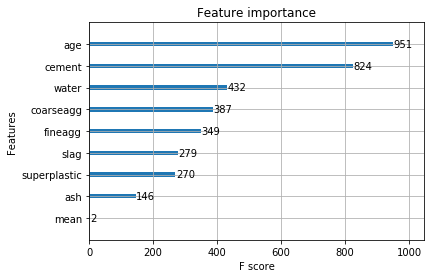

In [96]:
xgboost.plot_importance(xgb)

In [97]:
xgb_pred = xgb.predict(x_test)

In [98]:
xgb_score = r2_score(y_test,xgb_pred)

In [99]:
xgb_score

0.8816356885405026

In [100]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [101]:
xgb_rmse

5.546408213650128

In [102]:
l = []
threshold = np.sort(xgb.feature_importances_)
for t in threshold:
    selection = SelectFromModel(xgb,threshold = t,prefit = True)
    select_x_train = selection.transform(x_train)
    xgb1 = XGBRegressor()
    xgb1.fit(select_x_train,y_train)
    select_x_test = selection.transform(x_test)
    xgb_predict = xgb1.predict(select_x_test)
    result = [t,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,xgb_predict)),r2_score(y_test,xgb_predict)]
    l.append(result)

result_df = pd.DataFrame(l,columns=['Threshold','No. of features','RMSE','R2score'])
result_df

Threshold  No. of features       RMSE   R2score
0   0.000000               10   5.546408  0.881636
1   0.031566                9   5.546408  0.881636
2   0.035002                8   5.557678  0.881154
3   0.047046                7   5.496256  0.883767
4   0.066635                6   5.533522  0.882185
5   0.074241                5   5.705444  0.874751
6   0.125877                4   5.810221  0.870108
7   0.161884                3   7.451666  0.786350
8   0.212526                2   8.373145  0.730242
9   0.245223                1  14.266649  0.216857

In [103]:
x_train

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
282   382.0    0.0    0.0  186.0           0.0     1047.0    739.0  28.0   
599   145.0    0.0  134.0  181.0          11.0      979.0    812.0  28.0   
252   153.0  239.0    0.0  200.0           6.0     1002.0    684.0  28.0   
193   159.0  209.0  161.0  201.0           7.0      848.0    669.0  28.0   
644   173.8   93.4  159.9  172.3           9.7     1007.2    746.6  14.0   
..      ...    ...    ...    ...           ...        ...      ...   ...   
802   148.5  139.4  108.6  192.7           6.1      892.4    780.0  28.0   
53    234.0  156.0    0.0  189.0           5.9      981.0    760.0  28.0   
350   173.0  116.0    0.0  192.0           0.0      946.8    856.8  90.0   
79    168.9   42.2  124.3  158.3          10.8     1080.8    796.2  56.0   
792   333.0    0.0    0.0  192.0           0.0      931.2    842.6   7.0   

           mean  median  
282  376.731317   362.6  
599  203.132804   202.0  
252  203.132804   202.0  
193  203.132804   202.0  
644  203.132804   202.0  
..          ...     ...  
802  203.132804   202.0  
53   203.132804   202.0  
350  203.132804   202.0  
79   203.132804   202.0  
792  376.731317   362.6  

[721 rows x 10 columns]

In [104]:
x1 = x_train.drop(['ash','mean','median'],axis =1)
#x1 = x_train.drop(['ash','mean','label''median'],axis =1)

In [105]:
y1 = y_train

In [106]:
kfold_cv_hyperparameter_tuned(x1,y1)

Model names  Score mean  Score STD
9                XGB Regressor    0.886484   0.029729
4      Random Forest Regressor    0.881801   0.022178
8  Gradient Boosting Regressor    0.871932   0.028036
1      Decision Tree Regressor    0.746074   0.089994
7           AdaBoost Regressor    0.744677   0.023301
6                        Ridge    0.691411   0.072857
5                        Lasso    0.691411   0.072855
0            Linear Regression    0.691410   0.072858
3         KNeighbors Regressor    0.653377   0.062597
2                          SVR    0.197084   0.048504

In [113]:
# Plotting learning curves

def plot_learn_curve(modelname,model):
    train_size,train_score,test_score = learning_curve(estimator=model,X=x1,y=y1,cv=10)
    train_score_mean = np.mean(train_score,axis =1)
    test_score_mean = np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color = 'blue')
    plt.plot(train_size,test_score_mean,color = 'red')
    plt.xlabel('Sample')
    plt.ylabel('Accuracy')
    plt.title(f'Learning curve of {modelname}')
    plt.legend(('Training score','Testing score'))

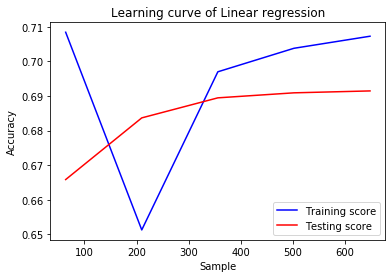

In [114]:
plot_learn_curve('Linear regression',LinearRegression())

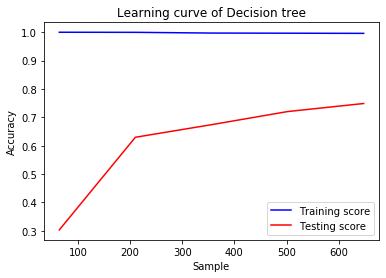

In [115]:
plot_learn_curve('Decision tree',DecisionTreeRegressor())

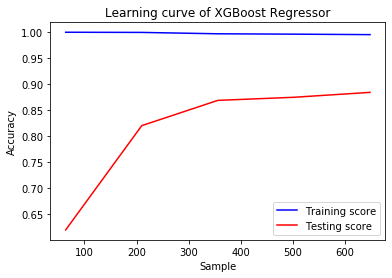

In [116]:
plot_learn_curve('XGBoost Regressor',XGBRegressor())